In [1]:
#Loading the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re, string, unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset

imdb_data = pd.read_csv('IMDB Dataset.csv')
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
#Summary of the dataset

imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
# informations regarding the dataset

imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
# sentiment count

imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

* Hence, the dataset is balanced!

In [6]:
# 1st review of the dataset

imdb_data.loc[0,'review']

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

## Splitting the dataset in Training and Testing set

In [7]:
# Train Dataset

train_reviews = imdb_data['review'][:40000]
train_sentiments = imdb_data['sentiment'][:40000]

# Test Dataset

test_reviews = imdb_data['review'][40000:]
test_sentiments = imdb_data['sentiment'][40000:]

print(train_reviews.shape, train_sentiments.shape)
print(test_reviews.shape, test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


## Text Normalization

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MANOJIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Tokenization of text
tokenizer = ToktokTokenizer()

#Setting English stopwords
stopword_list = nltk.corpus.stopwords.words('english')

## Removing html strips and noise text

In [10]:
# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_third_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Remoivng the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_third_brackets(text)
    return text

# Apply function on review column
imdb_data['review'] = imdb_data['review'].apply(denoise_text)

## Removing special charecter

In [11]:
# Define function for removing special charecters
def remove_special_charecters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

# Apply function on review column
imdb_data['review'] = imdb_data['review'].apply(remove_special_charecters)

## Text stemming

In [12]:
# Stemming the text
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

# Apply function on review column
imdb_data['review'] = imdb_data['review'].apply(simple_stemmer)

## Removing stopwords

In [13]:
# set stopwords to english
stop = set(stopwords.words('english'))
print(stop)

{'once', 'himself', 'too', "needn't", 'for', 'he', 'by', 'are', 'just', "you're", "mightn't", 'doesn', 'a', "that'll", 'as', 'his', 'it', 'because', 'their', 'did', 'd', 'didn', 'most', 'themselves', 'again', 'can', "couldn't", 'itself', 'm', 'who', 'these', "haven't", "doesn't", 'nor', 'of', 'couldn', 'during', 'shan', "wasn't", 'below', 'i', 'no', "don't", 'weren', 'theirs', 're', "you've", 'she', 'your', 'those', 'my', 'mustn', 'shouldn', 'what', "didn't", 'same', 'some', 'so', "isn't", 'mightn', "it's", 'yourself', "hasn't", 'you', 'there', 'had', 'or', 'to', 'am', 'hasn', 'aren', 'wasn', 'will', 'from', 'hers', 'this', 'at', 'which', 'does', 'if', 't', 'ours', 'very', 'isn', 'and', 'doing', 'between', 'why', 'ain', 'being', 'until', "wouldn't", 'should', 'herself', 'needn', 'him', 'was', 'all', 'off', 'we', 'how', 'before', 'yourselves', 'then', 'haven', 'under', "hadn't", 'out', 'have', 'on', 'now', 'further', 'any', 'few', 'than', 'do', 'but', 'o', 'be', 'don', 'ourselves', 'tha

In [14]:
# Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]

    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

imdb_data['review'] = imdb_data['review'].apply(remove_stopwords)

## Normalized train reviews

In [15]:
normalized_train_reviews = imdb_data.review[:40000]
normalized_train_reviews[0]

'one review ha mention watch 1 Oz episod youll hook right thi exactli happen meth first thing struck Oz wa brutal unflinch scene violenc set right word GO trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call OZ nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda Em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast Oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

## Normaslized test reviews

In [16]:
normalized_test_reviews = imdb_data.review[40000:]
normalized_test_reviews[45001]

'macarthur great movi great stori great man gener dougla macarthur thi cours stori one america great militari figur figur made familiar earliest moment memori though continu issu may eg macarthur speech portray film hi 1962 address US militari academi accept thayer award contain phrase old soldier never die fade away wa hi speech congress upon hi dismiss presid truman 1951 hi alleg insubordin two see eye eye gregori peck impeck gener vow would return philippin world war II film move quickli easili gener hi famili hi staff begin second world war end hi servic career thi film would much greater signific one familiar WW II korean war nevertheless peck portray thi great man fought twin evil fascism commun hate war onli soldier memor one inde war substitut victori'

## Bags of words model

In [17]:
# Count vectorizer for bag of words
cv = CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1,3))

#transformed train reviews
cv_train_reviews = cv.fit_transform(normalized_train_reviews)

#transformed test reviews
cv_test_reviews = cv.transform(normalized_test_reviews)

print(f'Bags of Words of CV_train: {cv_train_reviews}')
print(f'Bags of Words of CV_train: {cv_test_reviews}')

Bags of Words of CV_train:   (0, 6092459)	1
  (0, 3322890)	1
  (0, 4543777)	1
  (0, 5804256)	1
  (0, 3921798)	1
  (0, 2427989)	1
  (0, 3419944)	1
  (0, 5161863)	1
  (0, 727813)	1
  (0, 5684597)	1
  (0, 5811823)	1
  (0, 4846998)	1
  (0, 2469715)	1
  (0, 5508678)	1
  (0, 5811052)	1
  (0, 2438285)	1
  (0, 5736630)	1
  (0, 6092460)	1
  (0, 768377)	1
  (0, 2238084)	1
  (0, 3896748)	1
  (0, 4698887)	1
  (0, 5082807)	1
  (0, 3990552)	1
  (0, 3266570)	1
  :	:
  (39999, 4572381)	1
  (39999, 5878931)	1
  (39999, 5279013)	1
  (39999, 2787019)	1
  (39999, 890300)	1
  (39999, 4846045)	1
  (39999, 1428499)	1
  (39999, 3521664)	1
  (39999, 2699914)	1
  (39999, 4641898)	1
  (39999, 3811885)	1
  (39999, 1144944)	1
  (39999, 4159669)	1
  (39999, 753728)	1
  (39999, 4646087)	1
  (39999, 5415954)	1
  (39999, 5950312)	1
  (39999, 1413855)	1
  (39999, 5848653)	1
  (39999, 1856926)	1
  (39999, 504750)	1
  (39999, 4046429)	1
  (39999, 3849837)	1
  (39999, 3209372)	1
  (39999, 407607)	1
Bags of Words of CV_tra

In [18]:
print(f'Bags of Words of CV_train: {cv_train_reviews.shape}')
print(f'Bags of Words of CV_train: {cv_test_reviews.shape}')

Bags of Words of CV_train: (40000, 6209089)
Bags of Words of CV_train: (10000, 6209089)


## Term Frequency-Inverse Document Frequency Model(TFIDF)

In [31]:
# Tfidf vectorizor
tv = TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range = (1,3))

#transformed train reviews
tv_train_reviews = tv.fit_transform(normalized_train_reviews)

#transformed test reviews
tv_test_reviews = tv.transform(normalized_test_reviews)

print('Tfidf_train: ',tv_train_reviews.shape)
print('Tfidf_test: ', tv_test_reviews.shape)

Tfidf_train:  (40000, 6209089)
Tfidf_test:  (10000, 6209089)


## Labeling the sentiment data

In [32]:
# labeling the sentiment data
lb = LabelBinarizer()

#transformed sentiment data
sentiment_data = lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


## Split the sentiment data

In [33]:
train_sentiments = sentiment_data[:40_000]
test_sentiments = sentiment_data[40_000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


## Modeling the dataset


In [34]:
# training the model
lr_classifier = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=100)

In [35]:
#Fitting the model for Bag of words
lr_bow=lr_classifier.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr_classifier.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=100)
LogisticRegression(C=1, max_iter=500, random_state=100)


In [36]:
#Predicting the model for bag of words
lr_bow_predict=lr_classifier.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr_classifier.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


## Accuracy of the model

In [38]:
# Accuracy of the bag of words
lr_bow_score = accuracy_score(test_sentiments, lr_bow_predict)
print("lr_bow_score :", lr_bow_score)

# Accuracy of tfidf features
lr_tfidf_score = accuracy_score(test_sentiments, lr_tfidf_predict)
print("lr_tfidf_score :", lr_tfidf_score)

lr_bow_score : 0.7512
lr_tfidf_score : 0.75


## Printing the classification report

In [39]:
#classification report for bag of words
lr_bow_report = classification_report(test_sentiments, lr_bow_predict, target_names=['Positive', 'Negative'])
print(lr_bow_report)

# classification report for tfidf features
lr_tfidf_report = classification_report(test_sentiments, lr_tfidf_predict, target_names=['Positive', 'Negative'])
print(lr_tfidf_report)
                                      

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



## Confusion Matrix

In [40]:
# confusion matrix for bag of words
cm_bow = confusion_matrix(test_sentiments, lr_bow_predict, labels=[1,0])
print(cm_bow)

#confusion matrix for tfidf features
cm_tfidf = confusion_matrix(test_sentiments, lr_tfidf_predict, labels=[1,0])
print(cm_tfidf)

[[3768 1239]
 [1249 3744]]
[[3663 1344]
 [1156 3837]]


## Stochastic gradient descent or Linear support vector machines for bag of words and tfidf features

In [41]:
# training the linear svm
svm = SGDClassifier(loss='hinge', max_iter=600, random_state=100)
#fitting the svm for bag of words
svm_bow = svm.fit(cv_train_reviews, train_sentiments)
print(svm_bow)

# fitting the svm for tfidf features
svm_tfidf = svm.fit(tv_train_reviews, train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=600, random_state=100)
SGDClassifier(max_iter=600, random_state=100)


## Model performance on Test Data

In [43]:
# Predicting the model for bag of words
svm_bow_predict = svm.predict(cv_test_reviews)
print(svm_bow_predict)

#predicting the model for tfidf features
svm_tfidf_predict = svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 0 0 ... 0 1 1]
[1 1 1 ... 1 1 1]


## Accuracy of the model

In [45]:
# Accuracy score for bag of words
svm_bow_score = accuracy_score(test_sentiments, svm_bow_predict)
print("SVM BOW score: ", svm_bow_score)

# Accuracy score for TFIDF features
svm_tfidf_score = accuracy_score(test_sentiments, svm_tfidf_predict)
print("SVM TFIDF score: ",svm_tfidf_score)

SVM BOW score:  0.6765
SVM TFIDF score:  0.5134


## Print the classification report


In [46]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.88      0.41      0.56      4993
    Negative       0.61      0.95      0.75      5007

    accuracy                           0.68     10000
   macro avg       0.75      0.68      0.65     10000
weighted avg       0.75      0.68      0.65     10000

              precision    recall  f1-score   support

    Positive       0.99      0.03      0.05      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



## Plot the confusion matrix

In [47]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4742  265]
 [2970 2023]]
[[5006    1]
 [4865  128]]


## Multinomial Naive Bayes for bag of words and tfidf features

In [48]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


## Predicting the model performance on testing data

In [49]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


## Accuracy score of the model

In [50]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.751
mnb_tfidf_score : 0.7509


## Print the classification report

In [51]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



## Plot the confusion matrix

In [52]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3736 1271]
 [1219 3774]]
[[3729 1278]
 [1213 3780]]


## Visualization of positive and negative words using WordCloud

<function matplotlib.pyplot.show(close=None, block=None)>

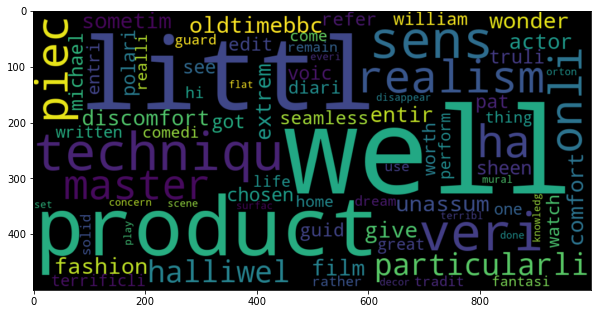

In [54]:
# Word Clouds for positive review words
plt.figure(figsize=(10,10))
positive_text=normalized_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

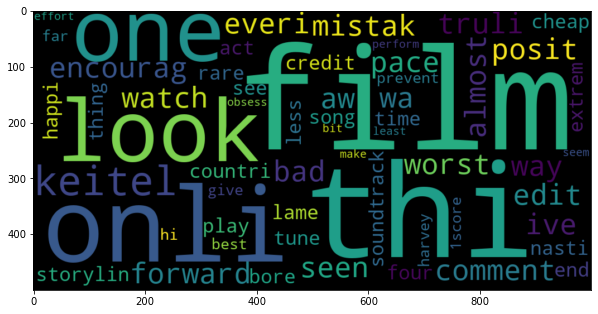

In [56]:
# Word Cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=normalized_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

## Summary:
* As we can observe, the model accuracy of the Logistic Regression Model and the Multinomial Naive Bayes Model are comparatively performing well. 
* We can improve the accuracy score of the models by preprocessing the dataset.
* We can improve the accuracy of the model by using lexicon models.